# Hierarchical Clustering

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

## Using the dendrogram to find the optimal number of clusters

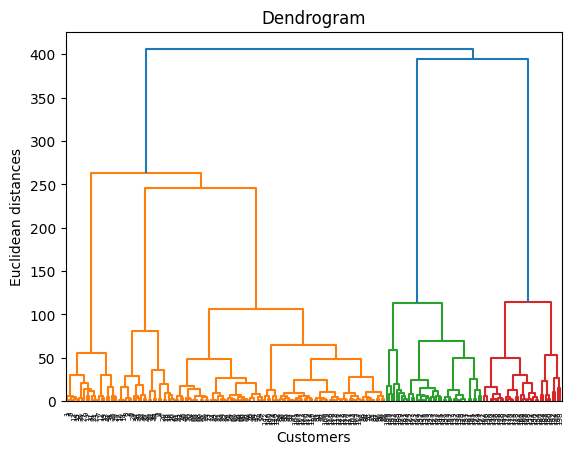

In [ ]:
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(X, method='ward'))  # ward method tries to minimize variance within each cluster, linkage links the clusters
plt.title('Dendrogram')
plt.xlabel('Customers') # this is each point because this is how a dendogram works
plt.ylabel('Euclidean distances') # this is the distance between the points, how a dendogram works
plt.show() #sch.dendogram internally used plt


## Training the Hierarchical Clustering model on the dataset

In [14]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward') # ward is the most common method
y_hc = hc.fit_predict(X)


## Visualising the clusters

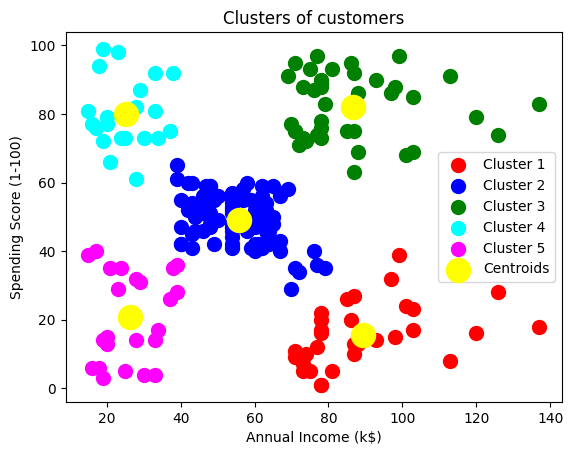

In [16]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

def get_cetroids(X, y_hc, cluster):
    return np.mean(X[y_hc == cluster], axis = 0)  

clusters = np.array([get_cetroids(X, y_hc, i) for i in range(5)])
plt.scatter(clusters[:, 0], clusters[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
